In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import ks_2samp
from scipy import stats
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

In [2]:

def read_error_csv(path):

    if os.path.exists(path):
        df = pd.read_csv(path)
        return df
    return None

In [3]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [4]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]


In [5]:
def separate_epilepsy_PBS(Embeddings): #To separate the Embeddings into controls, irm_neg and irm_pos
    Embeddings = Embeddings.rename(columns={Embeddings.columns[0]: "Index"})

    Embeddings_control = Embeddings.merge(epilepsy_controls[["Index"]], on="Index", how="inner")

    return Embeddings_control

In [6]:
def remove_first_column(Embeddings):
    X= Embeddings.iloc[:,1:76]
    return X

In [7]:
def Normalisation(X1, X2, X3, X4):
    scaler = StandardScaler()
    X1 = scaler.fit_transform(X1)
    X2=scaler.transform(X2)
    X3=scaler.transform(X3)
    X4=scaler.transform(X4)

    return X1, X2, X3, X4

In [8]:
def proportion_positive(L):
    n_total = len(L)
    n_pos = np.sum(L == 1)

    return n_pos / n_total

In [9]:
dir_path= "/neurospin/tmp/fred/models/2025-11-10" 

In [10]:
def PLOT(ax, nu, prop_positive_UKB, prop_positive_hcp, prop_positive_control, prop_positive_PEPR):
    ax.plot(nu, prop_positive_UKB, marker='o', linestyle='-', label="UKB")
    ax.plot(nu, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
    ax.plot(nu, prop_positive_control, marker='o', linestyle='-', label="control in epilepsy_PBS")
    ax.plot(nu, prop_positive_PEPR,marker='o', linestyle='-', label="PEPR_Marseille")



In [11]:
def Calcul(nu, X1, X2, X3, X4):
    prop_positive_UKB= []
    prop_positive_hcp= []
    prop_positive_control= []
    prop_positive_neg= []

    n_models = 25
    M=75
    subset_size= M//2

    for u in nu:
        print(u)

        predictions_all1 = np.zeros((X1.shape[0], n_models))
        predictions_all2 = np.zeros((X2.shape[0], n_models))
        predictions_all3 = np.zeros((X3.shape[0], n_models))
        predictions_all4 = np.zeros((X4.shape[0], n_models))

        for j in range(n_models):
                # Sélection aléatoire d'un sous-ensemble de features
            features_idx = np.random.choice(M, subset_size, replace=False)
            X_subset1 = X1[:, features_idx]
            X_subset2 = X2[:, features_idx]
            X_subset3 = X3[:, features_idx]
            X_subset4 = X4[:, features_idx]

            clf = OneClassSVM(kernel='rbf', gamma='scale', nu=u)
            clf.fit(X_subset1)
            y_pred1 = clf.predict(X_subset1)
            y_pred2 = clf.predict(X_subset2)
            y_pred3 = clf.predict(X_subset3)
            y_pred4 = clf.predict(X_subset4)

            predictions_all1[:, j] = y_pred1
            predictions_all2[:, j] = y_pred2
            predictions_all3[:, j] = y_pred3
            predictions_all4[:, j] = y_pred4

        y1 = (predictions_all1.mean(axis=1) > 0).astype(int)
        y2 = (predictions_all2.mean(axis=1) > 0).astype(int)
        y3 = (predictions_all3.mean(axis=1) > 0).astype(int)
        y4 = (predictions_all4.mean(axis=1) > 0).astype(int)

        prop_positive_UKB.append(proportion_positive(y1))
        prop_positive_hcp.append(proportion_positive(y2))
        prop_positive_control.append(proportion_positive(y3))
        prop_positive_neg.append(proportion_positive(y4))

        if u==nu[0]:
            t =1-proportion_positive(y4)

    return prop_positive_UKB, prop_positive_hcp, prop_positive_control, prop_positive_neg, t

In [12]:
import re

In [13]:
selected_index = np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/All the subjects/histogram_non_zero/index_to_save.npy")

0
0.02
0.04
0.06
0.08
0.1
1
0.02
0.04
0.06
0.08
0.1
2
0.02
0.04
0.06
0.08
0.1
3
0.02
0.04
0.06
0.08
0.1
4
0.02
0.04
0.06
0.08
0.1
5
0.02
0.04
0.06
0.08
0.1
6
0.02
0.04
0.06
0.08
0.1
7
0.02
0.04
0.06
0.08
0.1
8
0.02
0.04
0.06
0.08
0.1
9
0.02
0.04
0.06
0.08
0.1
10
0.02
0.04
0.06
0.08
0.1
11
0.02
0.04
0.06
0.08
0.1
12
0.02
0.04
0.06
0.08
0.1
13
0.02
0.04
0.06
0.08
0.1
14
0.02
0.04
0.06
0.08
0.1
15
0.02
0.04
0.06
0.08
0.1
16
0.02
0.04
0.06
0.08
0.1
17
0.02
0.04
0.06
0.08
0.1
18
0.02
0.04
0.06
0.08
0.1
19
0.02
0.04
0.06
0.08
0.1
20
0.02
0.04
0.06
0.08
0.1
21
0.02
0.04
0.06
0.08
0.1
22
0.02
0.04
0.06
0.08
0.1
23
0.02
0.04
0.06
0.08
0.1
24
0.02
0.04
0.06
0.08
0.1
25
0.02
0.04
0.06
0.08
0.1
26
0.02
0.04
0.06
0.08
0.1
27
0.02
0.04
0.06
0.08
0.1
28
0.02
0.04
0.06
0.08
0.1
29
0.02
0.04
0.06
0.08
0.1
30
0.02
0.04
0.06
0.08
0.1
31
0.02
0.04
0.06
0.08
0.1
32
0.02
0.04
0.06
0.08
0.1
33
0.02
0.04
0.06
0.08
0.1
34
0.02
0.04
0.06
0.08
0.1
35
0.02
0.04
0.06
0.08
0.1
36
0.02
0.04
0.06
0.08
0.1
37
0.02
0.0

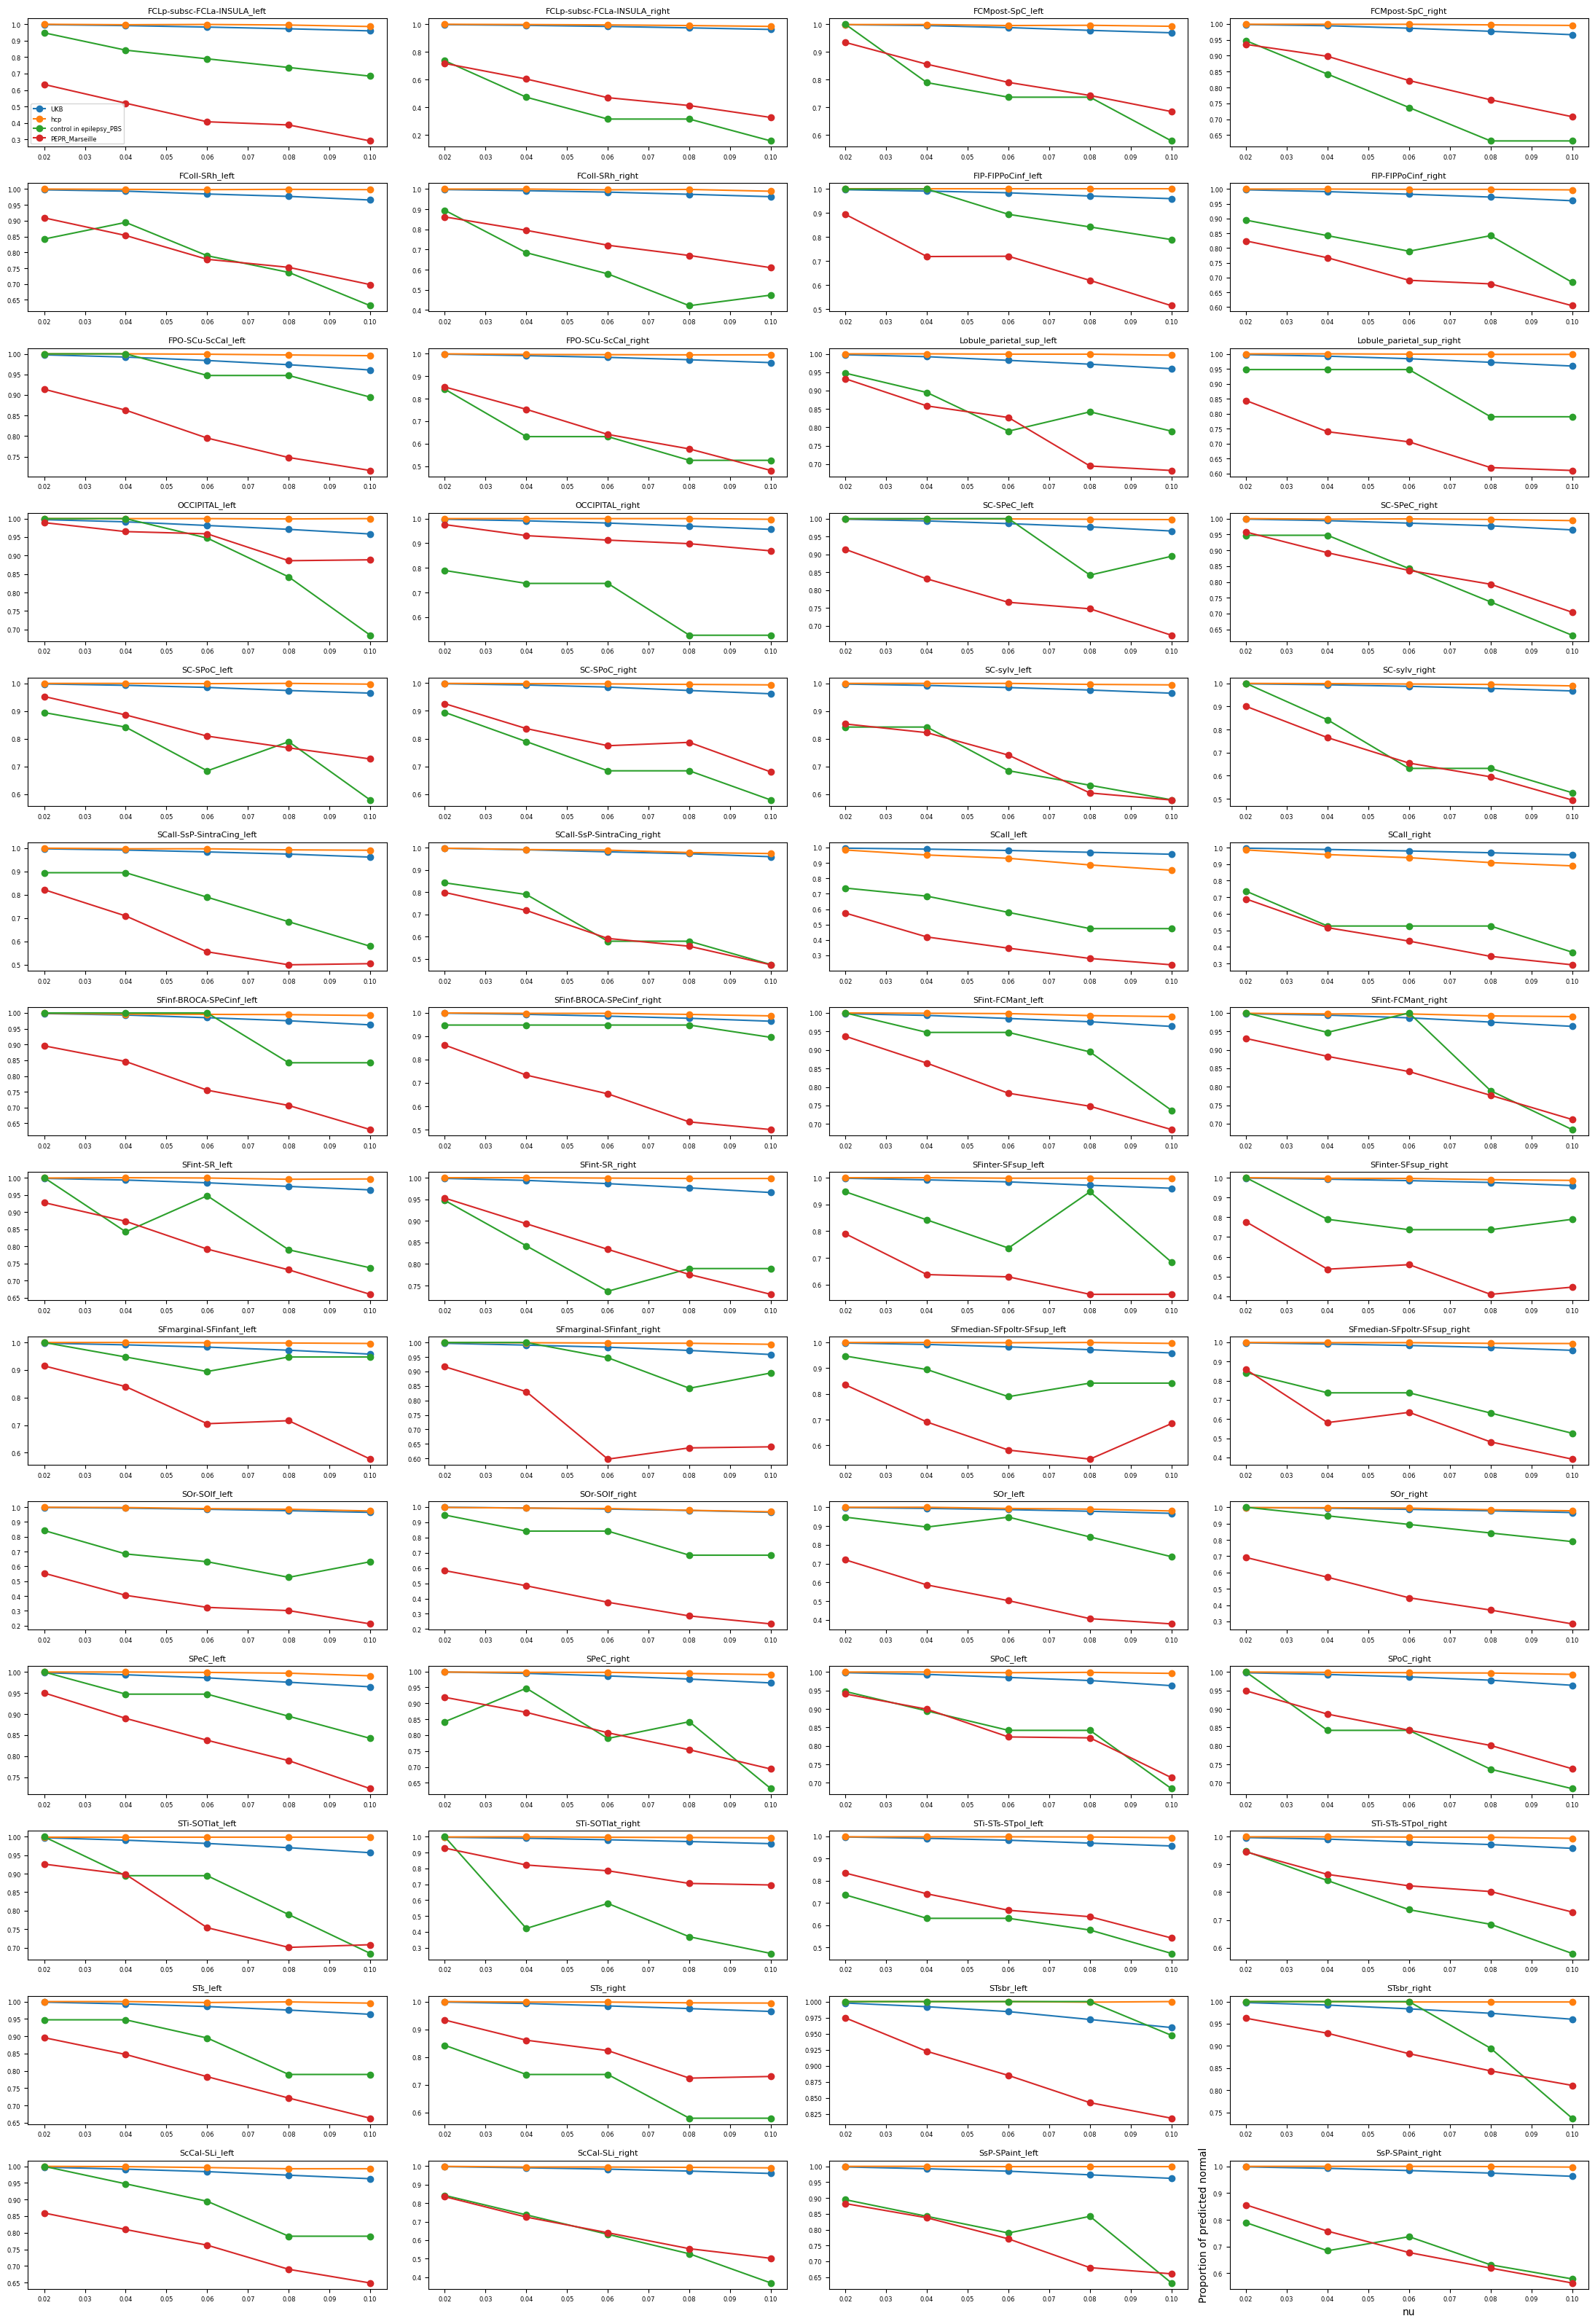

In [14]:

subfolders = sorted([
    f for f in os.listdir(dir_path)
    if os.path.isdir(os.path.join(dir_path, f))
])


rows, cols = 14, 4
total_plots = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(22, 32))
axes = axes.flatten()

ks_table =pd.DataFrame(columns=["regions", "Proportion of predicted abnormal on PEPR_Marseille"])
nu = np.arange(0.02,0.11,0.02)
for i, folder in enumerate(subfolders):
    print(i)
    regions=re.match(r"(.*?(left|right))", folder).group(1)

    ax = axes[i]
    current_path = os.path.join(dir_path, folder)

    ukb_file = os.path.join(current_path, "Embeddings.csv")
    hcp_file = os.path.join(current_path, "hcp", "Embeddings.csv")
    epi_file = os.path.join(current_path, "epilepsy_PBS", "Embeddings.csv")
    PEPR_file= os.path.join(current_path, "PEPR_Marseille","Embeddings.csv")


    # lecture
    Embeddings_ukb = read_error_csv(ukb_file)
    Embeddings_hcp = read_error_csv(hcp_file)
    Embeddings_epilepsy = read_error_csv(epi_file)
    Embeddings_PEPR = read_error_csv(PEPR_file)
    
    Embeddings_PEPR= Embeddings_PEPR.loc[selected_index]

    Embeddings_control= separate_epilepsy_PBS(Embeddings_epilepsy)

    X1= remove_first_column(Embeddings_ukb)
    X2= remove_first_column(Embeddings_hcp)
    X3= remove_first_column(Embeddings_control)
    X4= remove_first_column(Embeddings_PEPR)

    X1, X2, X3, X4= Normalisation(X1, X2, X3, X4)
    
    prop_positive_UKB, prop_positive_hcp, prop_positive_control, prop_positive_neg,t= Calcul(nu,X1, X2, X3, X4)

    PLOT(ax, nu, prop_positive_UKB, prop_positive_hcp, prop_positive_control, prop_positive_neg)

    ax.set_title(regions, fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    if i == 0:
        ax.legend(fontsize=6)
        plt.xlabel("nu")
        plt.ylabel("Proportion of predicted normal")
    ks_table.loc[i] = [regions, t]
plt.tight_layout()
plt.show()



In [15]:
names= ks_table.iloc[:,0]

value = ks_table.iloc[:, 1]

In [16]:
visualize_distance= pd.DataFrame({ "region": names,
                                  "p": value})

In [17]:
visualize_distance["p"]

0     0.366061
1     0.282424
2     0.065455
3     0.064242
4     0.090909
5     0.138182
6     0.105455
7     0.175758
8     0.086061
9     0.147879
10    0.067879
11    0.156364
12    0.010909
13    0.024242
14    0.086061
15    0.042424
16    0.047273
17    0.073939
18    0.146667
19    0.099394
20    0.178182
21    0.201212
22    0.425455
23    0.310303
24    0.104242
25    0.138182
26    0.063030
27    0.069091
28    0.072727
29    0.047273
30    0.209697
31    0.223030
32    0.084848
33    0.083636
34    0.164848
35    0.141818
36    0.446061
37    0.416970
38    0.280000
39    0.307879
40    0.049697
41    0.081212
42    0.059394
43    0.050909
44    0.073939
45    0.071515
46    0.164848
47    0.054545
48    0.104242
49    0.066667
50    0.025455
51    0.037576
52    0.140606
53    0.164848
54    0.117576
55    0.144242
Name: p, dtype: float64

In [18]:
sorted_distance = visualize_distance.sort_values(by="p", ascending=False)

In [19]:
sorted_distance.to_csv("Proportion_abnormal_on_PEPR")

Calcul du score d'anomalies par régions

In [20]:
def Calcul_score(X1, X2, X3, X4, nu=0.02):


    n_models = 25
    M=75
    subset_size= M//2

    score_all1 = np.zeros((X1.shape[0], n_models))
    score_all2 = np.zeros((X2.shape[0], n_models))
    score_all3 = np.zeros((X3.shape[0], n_models))
    score_all4 = np.zeros((X4.shape[0], n_models))

    for j in range(n_models):
                # Sélection aléatoire d'un sous-ensemble de features
        features_idx = np.random.choice(M, subset_size, replace=False)
        X_subset1 = X1[:, features_idx]
        X_subset2 = X2[:, features_idx]
        X_subset3 = X3[:, features_idx]
        X_subset4 = X4[:, features_idx]

        clf = OneClassSVM(kernel='rbf', gamma='scale', nu=nu)
        clf.fit(X_subset1)
        score1 = clf.decision_function(X_subset1)
        score2 = clf.decision_function(X_subset2)
        score3 = clf.decision_function(X_subset3)
        score4 = clf.decision_function(X_subset4)

        score_all1[:, j] = score1
        score_all2[:, j] = score2
        score_all3[:, j] = score3
        score_all4[:, j] = score4


    return -np.mean(score_all1), -np.mean(score_all2), -np.mean(score_all3), -np.mean(score_all4)

In [21]:
import re


In [22]:

subfolders = sorted([
    f for f in os.listdir(dir_path)
    if os.path.isdir(os.path.join(dir_path, f))
])



df_UKB =pd.DataFrame(columns=["region", "score"])
df_hcp =pd.DataFrame(columns=["region", "score"])
df_control =pd.DataFrame(columns=["region", "score"])
df_PEPR =pd.DataFrame(columns=["region", "score"])

for i, folder in enumerate(subfolders):
    print(i)
    regions=re.match(r"(.*?(left|right))", folder).group(1)

    current_path = os.path.join(dir_path, folder)

    ukb_file = os.path.join(current_path, "Embeddings.csv")
    hcp_file = os.path.join(current_path, "hcp", "Embeddings.csv")
    epi_file = os.path.join(current_path, "epilepsy_PBS", "Embeddings.csv")
    PEPR_file= os.path.join(current_path, "PEPR_Marseille","Embeddings.csv")


    # lecture
    Embeddings_ukb = read_error_csv(ukb_file)
    Embeddings_hcp = read_error_csv(hcp_file)
    Embeddings_epilepsy = read_error_csv(epi_file)
    Embeddings_PEPR = read_error_csv(PEPR_file)

    Embeddings_PEPR= Embeddings_PEPR.loc[selected_index]
    Embeddings_control= separate_epilepsy_PBS(Embeddings_epilepsy)

    X1= remove_first_column(Embeddings_ukb)
    X2= remove_first_column(Embeddings_hcp)
    X3= remove_first_column(Embeddings_control)
    X4= remove_first_column(Embeddings_PEPR)

    X1, X2, X3, X4= Normalisation(X1, X2, X3, X4)
    
    score_UKB, score_hcp, score_control, score_PEPR = Calcul_score(X1, X2, X3, X4)

    df_UKB.loc[i] = [regions, score_UKB]
    df_hcp.loc[i] = [regions, score_hcp]
    df_control.loc[i] = [regions, score_control]
    df_PEPR.loc[i] = [regions, score_PEPR]



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


In [23]:
df_UKB.to_csv("UKB_anomaly_score")
df_hcp.to_csv("hcp_anomaly_score")
df_control.to_csv("control_anomaly_score")
df_PEPR.to_csv("PEPR_anomaly_score")
